In [1]:
# fetching dataset
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout


## Get the data and preprocess it.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape , y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
def plot_input_img(i):
    plt.imshow(x_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.axis('off')
    plt.show()

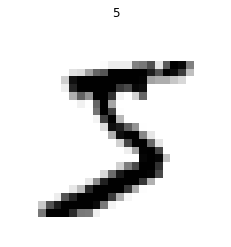

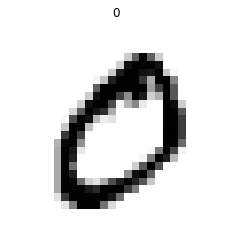

In [4]:
for i in range(2):
    plot_input_img(i)

In [5]:
#preprocess the images

#normalising the image to [0,1] range
x_train=x_train.astype(np.float32)/255
x_test=x_test.astype(np.float32)/255

x_train=np.expand_dims(x_train, -1)
x_test=np.expand_dims(x_test, -1)

y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)



In [6]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape= (28,28,1), activation= 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [8]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [9]:
#Earlystopping
es= EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1)

#Model CheckPoint

mc= ModelCheckpoint("./bestmodel.h5", monitor="val_acc", verbose=1, save_best_only=True) 

cb=[es, mc]


In [10]:
his = model.fit( x_train, y_train, epochs= 50, validation_split= 0.3, callbacks=cb)

Epoch 1/50
1313/1313 [==============================] - 105s 73ms/step - loss: 0.2182 - accuracy: 0.9330 - val_loss: 0.0829 - val_accuracy: 0.9741
Epoch 2/50
1313/1313 [==============================] - 92s 70ms/step - loss: 0.0708 - accuracy: 0.9779 - val_loss: 0.0561 - val_accuracy: 0.9824
Epoch 3/50
1313/1313 [==============================] - 91s 70ms/step - loss: 0.0539 - accuracy: 0.9830 - val_loss: 0.0531 - val_accuracy: 0.9846
Epoch 4/50
1313/1313 [==============================] - 94s 72ms/step - loss: 0.0436 - accuracy: 0.9866 - val_loss: 0.0473 - val_accuracy: 0.9852
Epoch 5/50
1313/1313 [==============================] - 94s 72ms/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0429 - val_accuracy: 0.9867
Epoch 6/50
1313/1313 [==============================] - 93s 71ms/step - loss: 0.0310 - accuracy: 0.9905 - val_loss: 0.0432 - val_accuracy: 0.9878
Epoch 7/50
1313/1313 [==============================] - 94s 72ms/step - loss: 0.0278 - accuracy: 0.9909 - val_loss: 0.0410 

In [15]:
model.save('best_model.h5')

In [21]:
model_S= keras.models.load_model("D://CODING WORLD//PROJECTS//Handwritten_Character_Recognition//best_model.h5")

In [22]:
score= model_S.evaluate(x_test, y_test)
print(f"the accuracy is{score[1]}")


313/313 [==============================] - 6s 18ms/step - loss: 0.0436 - accuracy: 0.9921
the accuracy is0.9921000003814697


In [32]:
from keras.models import load_model
import cv2
img=cv2.imread('Ds5Rc.png')
img= cv2.resize(img(320, 240))
img= np.reshape(img, [1,28,28,3])
classes= model.predict(img)
print(classes)


TypeError: 'numpy.ndarray' object is not callable